<a href="https://colab.research.google.com/github/yuva0418/Banking_Chatbot/blob/main/Banking_FAQ_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Overview

<div style="background-color:#d4f1f4; padding: 20px;">
<h2>Problem</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Ships aerial images object detection is a challenging task due to the large size of the images and the variability of the objects in the scene. Ships can appear at different scales, orientations, and under various lighting conditions. Manual inspection of these images can be time-consuming, and the detection of ships can be prone to errors due to human error or the sheer volume of images that need to be analyzed. Additionally, there is a need for an accurate and efficient object detection algorithm that can handle the scale and complexity of aerial images.</p>

<h2>Agitate</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">The current methods for ships aerial images object detection are either too time-consuming, too computationally intensive, or not accurate enough to meet the demands of the task. Traditional object detection methods are not able to handle the scale and complexity of aerial images, while deep learning-based methods such as YOLO have shown promising results but require extensive training to achieve high accuracy. Furthermore, the lack of a publicly available dataset of ships aerial images has limited the development of object detection models for this specific task. This makes it difficult for researchers and practitioners to test and compare their methods, hindering progress in this field.</p>

<h2>Solution</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">To overcome these challenges, YOLO can be used for ships aerial images object detection. YOLO is a deep learning-based object detection algorithm that has shown promising results in various applications. YOLO can handle the scale and complexity of aerial images while achieving high accuracy. Additionally, by using a publicly available dataset of ships aerial images, researchers and practitioners can compare and test their methods, leading to better models and advancements in the field. The development of YOLO-based models for ships aerial images object detection can lead to more efficient and accurate methods for monitoring ships in various applications, such as maritime surveillance, search and rescue, and environmental monitoring.</p>
</div>


# 🏗️Import Necessary Libraries
---

In [ ]:
# Pip install method (recommended)
%pip install ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.0/511.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 20.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

# Dataset Overview
---

## Visualizing Sample Images with Corresponding Annotations

In [1]:
# Define the paths to the images and labels directories
train_images = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images"
train_labels = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/train/labels"

test_images = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images"
test_labels = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/labels"

val_images = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/valid/images"
val_labels = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

NameError: name 'os' is not defined

## Image Metadata

In [2]:
# Load an image using OpenCV
image = cv2.imread("/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images/02e39612d_jpg.rf.cc5483bb711f080d12b644ff62cf977a.jpg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

NameError: name 'cv2' is not defined

# Model Training
---

In [ ]:
 # Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = '/kaggle/input/ships-in-aerial-images/ships-aerial-images/data.yaml',
            epochs = 20,
            imgsz = height,
            seed = 42,
            batch = 8,
            workers = 4)

  0%|          | 0.00/131M [00:00<?, ?B/s]

Ultralytics YOLOv8.0.72 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/ships-in-aerial-images/ships-aerial-images/data.yaml, epochs=20, patience=50, batch=8, imgsz=768, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=42, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.Conv                  [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.Conv                  [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.C2f                   [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.Conv                  [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.C2f                   [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.Conv                  [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.C2f                   [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias
train: Scanning /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/labels... 9697 images, 351 backgrounds, 2 corrupt: 100%|██████████| 9697/9697 [03:20<00:00, 48.35it/s]
train: WARNING ⚠️ /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images/1__20180714_180427_1029__-118-20071740708637_33-73029905538088_png.rf.330efa80ecbf49d6ceac7071288d64b4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0249]
train: WARNING ⚠️ /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images/1__20180714_180427_1029__-118-21100741654266_33-732092454738826_png.rf.7243f2b58b505e51950850f4b26081ba.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0079]
train: WARNING ⚠️ Cache directory /kaggle/input/ships-in-aerial-images/ships-aerial-images/train is not writeable, cache not 

# Model Performance
---
<div style="background-color:#f2f2f2; padding: 20px;">
    
<h2>Train Box Loss:</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The train box loss metric measures the difference between the predicted bounding boxes and the actual bounding boxes of the objects in the training data. A lower box loss means that the model's predicted bounding boxes more closely align with the actual bounding boxes.</p>
    
<h2>Train Class Loss:</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The train class loss metric measures the difference between the predicted class probabilities and the actual class labels of the objects in the training data. A lower class loss means that the model's predicted class probabilities more closely align with the actual class labels.</p>

<h2>Train DFL Loss:</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The train DFL (Dynamic Feature Learning) loss metric measures the difference between the predicted feature maps and the actual feature maps of the objects in the training data. A lower DFL loss means that the model's predicted feature maps more closely align with the actual feature maps.</p>
    
<h2>Metrics Precision (B):</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The metrics precision (B) metric measures the proportion of true positive detections among all the predicted bounding boxes. A higher precision means that the model is better at correctly identifying true positive detections and minimizing false positives.</p>
    
<h2>Metrics Recall (B):</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The metrics recall (B) metric measures the proportion of true positive detections among all the actual bounding boxes. A higher recall means that the model is better at correctly identifying all true positive detections and minimizing false negatives.</p>
    
<h2>Metrics mAP50 (B):</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The metrics mAP50 (B) metric measures the mean average precision of the model across different object categories, with a 50% intersection-over-union (IoU) threshold. A higher mAP50 means that the model is better at accurately detecting and localizing objects across different categories.</p>
    
<h2>Metrics mAP50-95 (B):</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The metrics mAP50-95 (B) metric measures the mean average precision of the model across different object categories, with IoU thresholds ranging from 50% to 95%. A higher mAP50-95 means that the model is better at accurately detecting and localizing objects across different categories with a wider range of IoU thresholds.</p>
</div>

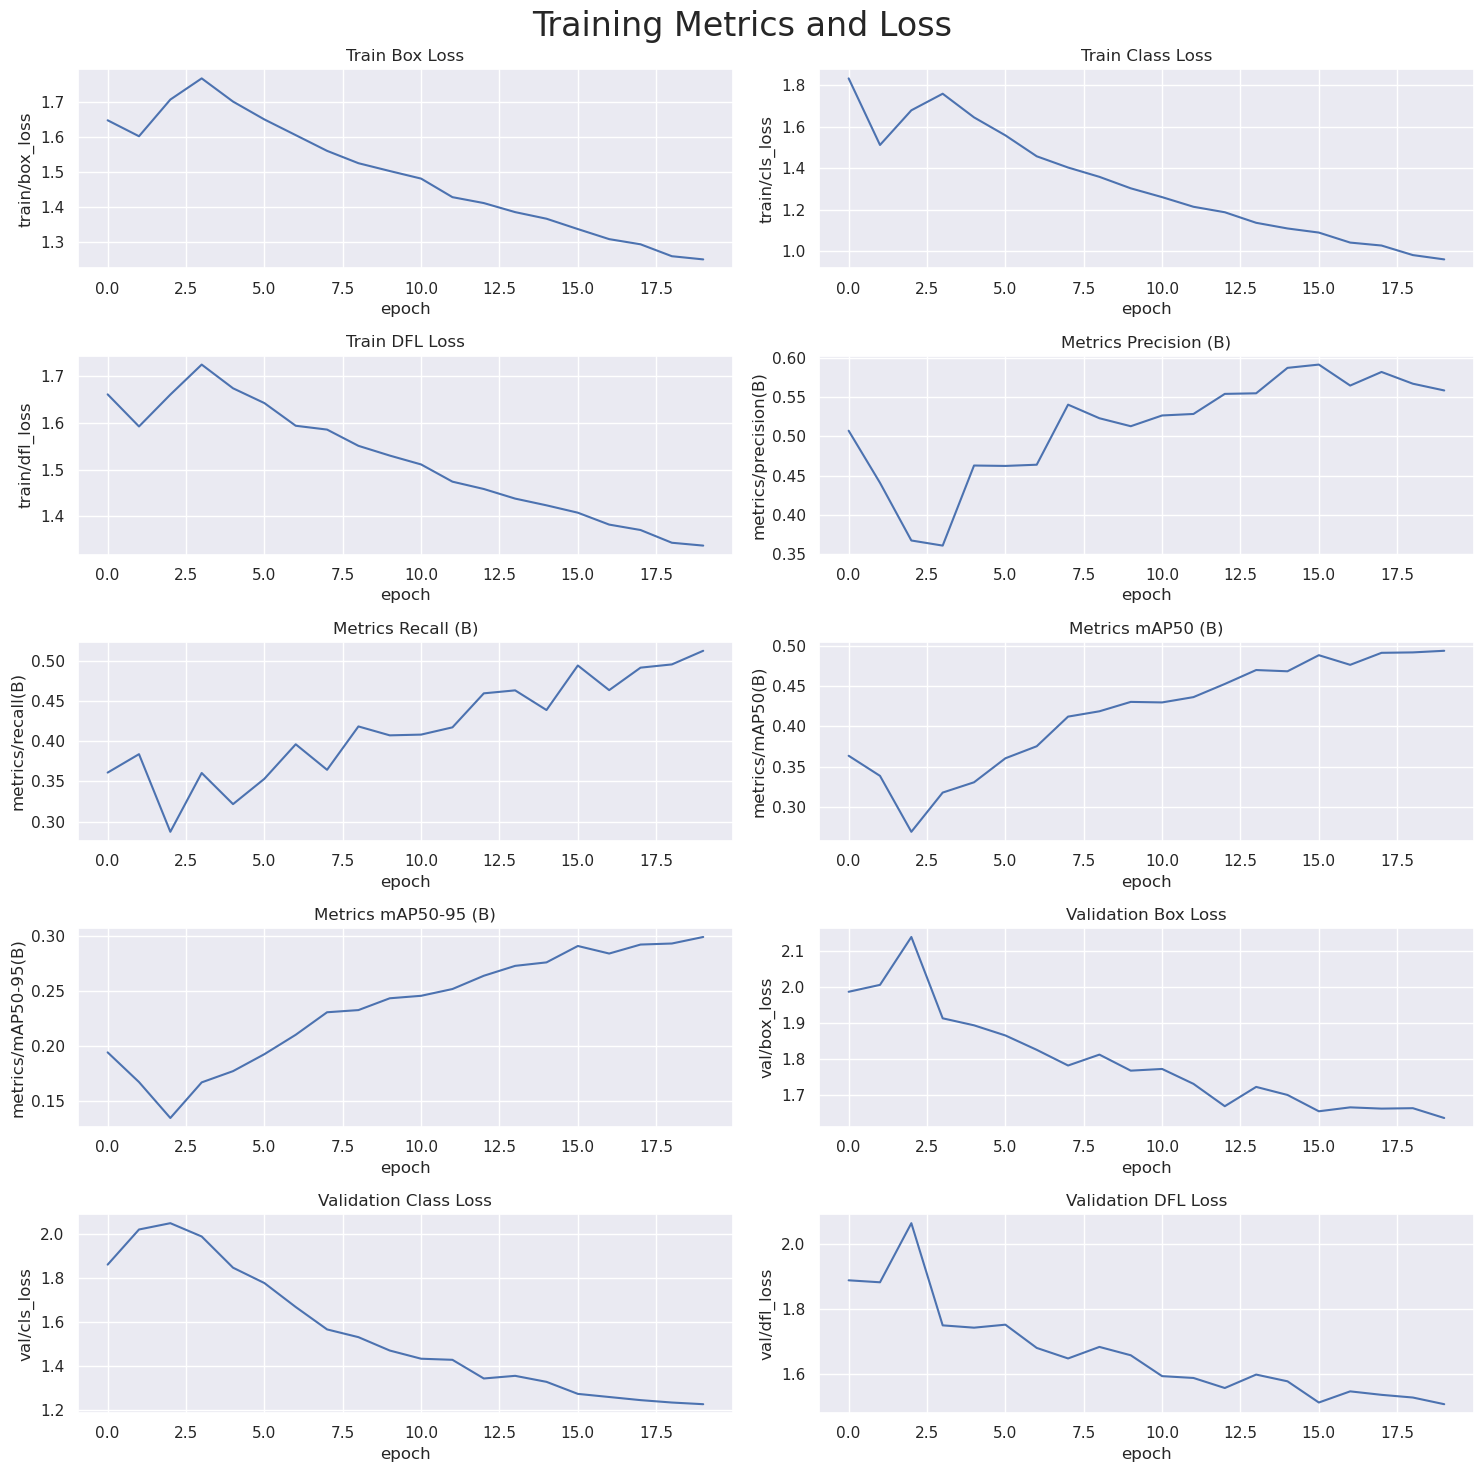

In [ ]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()


# Evaluation
---

<div style="background-color:#f2f2f2; padding: 20px;">
<h2>mAP Metrics</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">Mean Average Precision (mAP) is a popular evaluation metric in object detection, including the YOLO model. It is used to assess the accuracy of an object detection model by measuring how well it can detect objects in an image, as well as the precision of those detections. mAP takes into account both the number of correctly identified objects and the quality of the detections, which means that it is a robust metric for assessing the performance of an object detection model.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">In YOLO, mAP is particularly important because it measures the accuracy of the model in detecting objects of interest. The higher the mAP, the better the model is at identifying objects in an image. Since YOLO is an object detection model designed for real-time applications, achieving high mAP scores is crucial to ensure that the model can accurately detect objects in real-world scenarios. A high mAP score indicates that the model can effectively identify objects and can be used with confidence in real-world applications.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">However, it is worth noting that mAP is not a perfect metric and has its limitations. For example, it does not account for the difficulty of detecting certain types of objects or the importance of different object classes. Nevertheless, it remains a widely used and valuable metric for evaluating object detection models such as YOLO. With its ability to provide a reliable assessment of a model's ability to detect objects, mAP is an essential tool for both researchers and practitioners in the field of computer vision.</p>
</div>

In [ ]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.0.72 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /kaggle/input/ships-in-aerial-images/ships-aerial-images/test/labels... 1573 images, 51 backgrounds, 0 corrupt: 100%|██████████| 1573/1573 [00:32<00:00, 48.11it/s]
val: WARNING ⚠️ Cache directory /kaggle/input/ships-in-aerial-images/ships-aerial-images/test is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 106, len(boxes) = 2872. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [04:01<00:00,  2.44s/it]
                   all       1573       2872      0.776       0.31      0.557      0.387
Speed: 0.7ms preprocess, 148.6

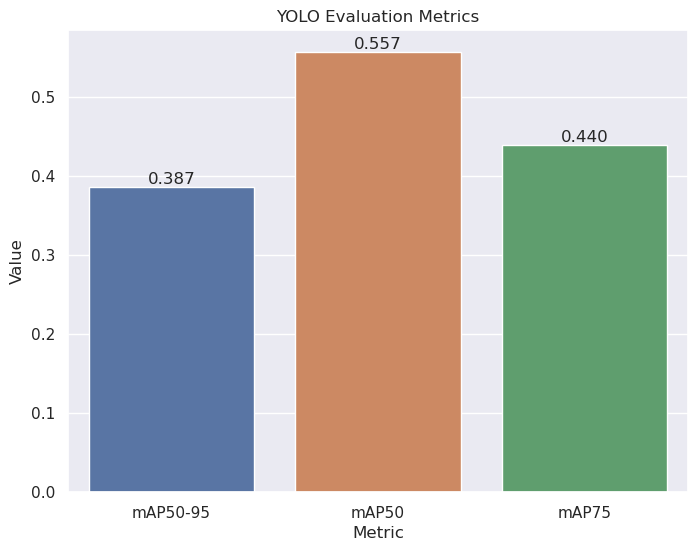

In [ ]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

<div style="background-color:#f2f2f2; padding: 20px;">
<h2>Confusion Matrix</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">Confusion matrix is a useful tool in evaluating the performance of object detection algorithms like YOLO. In object detection, the confusion matrix can be used to calculate various performance metrics like precision, recall, and F1 score. The confusion matrix is a table that summarizes the true positive, true negative, false positive, and false negative predictions made by the model. In the case of ship detection using YOLO, the confusion matrix can be used to evaluate the model's performance in detecting ships in aerial images.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The rows of the confusion matrix represent the ground truth labels (i.e., the actual presence or absence of a ship in the image), while the columns represent the predicted labels (i.e., the model's prediction of the presence or absence of a ship). The true positives (TP) represent the cases where the model correctly predicts the presence of a ship, while the true negatives (TN) represent the cases where the model correctly predicts the absence of a ship. The false positives (FP) represent the cases where the model incorrectly predicts the presence of a ship when there is none, while the false negatives (FN) represent the cases where the model incorrectly predicts the absence of a ship when there is one. By looking at these values, we can calculate various performance metrics that can help us evaluate the model's performance.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">Overall, the confusion matrix is a useful tool in evaluating the performance of object detection algorithms like YOLO. By using this tool, we can calculate various performance metrics like precision, recall, and F1 score, which can help us understand how well the model is performing in detecting ships in aerial images. This, in turn, can help us improve the model by identifying areas where it is making mistakes and tweaking the model's architecture and parameters accordingly.</p>
</div>

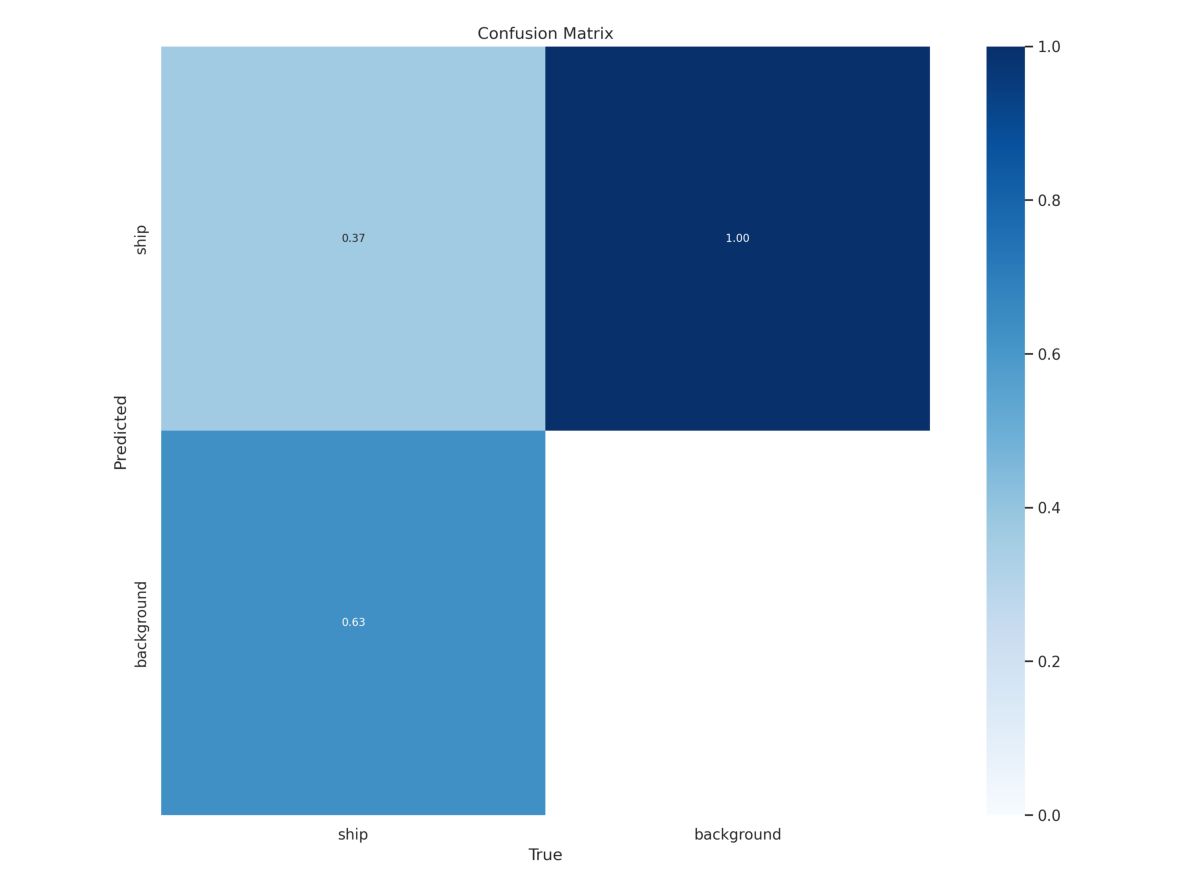

In [ ]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

# 🔮Making Predictions on Test Images
---

In [ ]:
# Function to perform ship detections
def ship_detect(img_path):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 768x768 6 ships, 149.9ms
Speed: 0.7ms preprocess, 149.9ms inference, 1.8ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 120.7ms
Speed: 0.7ms preprocess, 120.7ms inference, 1.6ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 119.3ms
Speed: 0.6ms preprocess, 119.3ms inference, 1.6ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 (no detections), 120.5ms
Speed: 0.6ms preprocess, 120.5ms inference, 0.8ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 121.2ms
Speed: 0.7ms preprocess, 121.2ms inference, 1.6ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 120.8ms
Speed: 0.6ms preprocess, 120.8ms inference, 1.6ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 119.7ms
Speed: 0.6ms preprocess, 119.7ms inference, 1.7ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 (no detections), 123.4ms
Speed: 0.6ms preprocess, 123.4ms inference, 0.9ms postprocess per image

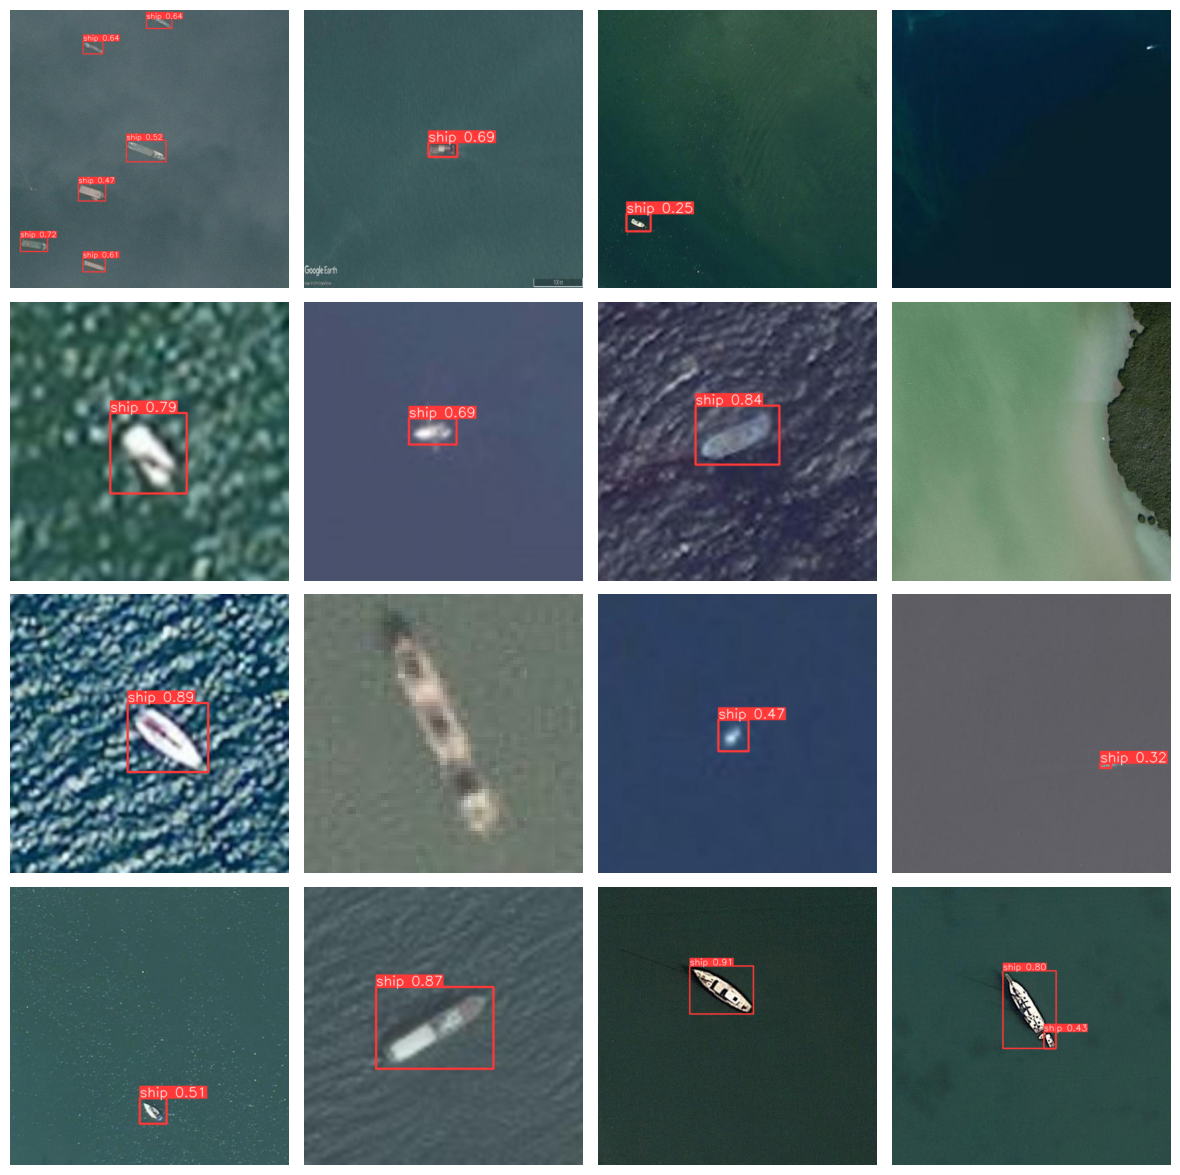

In [ ]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)
